# Projeto de Trainee para área de Visão computacional

Autor: Enzo Bustos Da Silva

Enunciado: [Neste link](https://docs.google.com/document/d/1OHXMaLwAEOT6qMVIhSAMeENSEoqoYZ86FarefWrXJg0/edit)

Imagens: [Aqui o zip](https://drive.google.com/file/d/1-vrNPi-BK9z1eLe2SbLqHEpol0XjT0sF/view?usp=sharing)

Separadas por conteúdo:

*   [Darth Vader](https://drive.google.com/drive/folders/1XlNkGmm0du5qVFLQcSyqCRSfZYKK7dv0?usp=sharing)
*   [Stormtrooper](https://drive.google.com/drive/folders/1qEFdkMoLJ5TniOalKUcYRDaxPpd-uDhb?usp=sharing)
*   [Yoda](https://drive.google.com/drive/folders/1E6u87qlrm8XfgItLM5oC15DE_yLo2tDc?usp=sharing)

# Parte 1 - Tarefas de manipulação:

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image

import tensorflow as tf
import torch
import sklearn as sk
import skimage
import glob
import os

## Tarefa 1 - Visualizar imagens

Crie uma função que recebe o endereço de imagem e retorne sua visualização de 3 formas: OpenCV, Matplotlib e Pillow
Para cada uma dessas formas vou usar um dos bancos de dados.

Links: 

*   [PIL](https://www.geeksforgeeks.org/python-pil-image-show-method/)
*   [Matplotlib](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html)
*   [OpenCV](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html)
*   [DataCamp](https://learn.datacamp.com/courses/image-processing-in-python)

In [2]:
local = r'C:\Users\Enzo\Desktop\Turing\Projeto Area de Foco'

In [3]:
# PIL - Abre no Visualizador de fotos do Windows

def abre_PIL(path):
    imagem_PIL = Image.open(path)
    imagem_PIL.show() 

arquivo = r'\Darth_JarJar_1.png'

abre_PIL(local + arquivo)

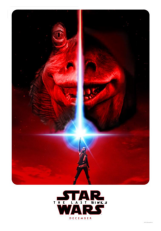

In [4]:
# PLT

def abre_PLT(path):
    imagem_PLT = plt.imread(path)
    plt.axis('off')
    plt.imshow(imagem_PLT)

arquivo = r'\Darth_JarJar_2.png'

abre_PLT(local + arquivo)

In [5]:
def abre_OpenCV(path):
    imagem_OpenCV = cv2.imread(path, cv2.IMREAD_COLOR)
    cv2.imshow('Output', imagem_OpenCV)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

arquivo = r'\Darth_JarJar_3.png'

abre_OpenCV(local + arquivo)

Eu não tava conseguindo abrir imagem JPG, mas deu bom aparentemente o openCV não lê path que tem acento eu tirei e deu certo

## Tarefa 2 - Espaço de cores

Criar função em que transforma imagem colorida em preto e branco em NumPy e depois fazer o mesmo utilizando a OpenCV.
Responda: Qual espaço de cores a bliblioteca OpenCV usa, RGB ou BGR ?

Links:

*   [OpenCV](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html)
*   [Medium](https://medium.com/tulisan-ibe/image-conversion-using-python-and-opencv-8cd7c0ef7051)

In [6]:
#Usando OpenCV

def OpenCV_toBnW(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imshow('Preto E Branco', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
path = r'C:\Users\Enzo\Desktop\Turing\Projeto Area de Foco\Yoda_1.png'
OpenCV_toBnW(path)

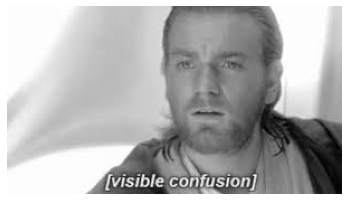

In [7]:
#Usando numpy

path = r'C:\Users\Enzo\Desktop\Turing\Projeto Area de Foco\ObiWan.jpg'
image = cv2.imread(path)
B, G, R = cv2.split(image)
altura, largura, channel = image.shape
Gray = np.zeros((altura, largura))
for linha in range(altura):
    for col in range(largura):
        b = B[linha][col]
        g = G[linha][col]
        r = R[linha][col]
        px = 0.299*r + 0.587*g + 0.144*b
        Gray[linha][col] = int(px)
plt.axis("off")
plt.imshow(Gray, cmap='gray', vmin=0, vmax=255)

Sei lá aqui deu certo, mas eu só consegui de fato quando eu coloquei o cmap="gray" e não sei se to burlando, eu tentei real me basear naquele código do medium mas eu não consegui, até quando eu colocava o mesmo código não ia, ficava uma imagem meio amarelona sei lá KKK pelo menos assim deu bom

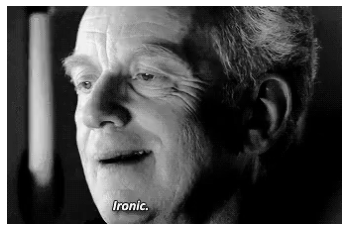

In [8]:
# Numpy alternativo

path = r'C:\Users\Enzo\Desktop\Turing\Projeto Area de Foco\Ironic.png'

img = plt.imread(path)
rgb_weights = [0.2989, 0.5870, 0.1140]

grayscale_image = np.dot(img[...,:3], rgb_weights)
plt.axis("off")
plt.imshow(grayscale_image, cmap=plt.get_cmap("gray"))

Eu não queria usar a mesma função que vocês passaram lá do medium então tentei fazer meio que do meu jeito para aprender

R: A biblioteca OpenCV utiliza, por padrão, o espaço de cores RGB, mas armazena os dados em formato BGR. Eu tirei essa info desse [link aqui](https://www.geeksforgeeks.org/color-spaces-in-opencv-python/#:~:text=There%20are%20several%20different%20color,default%20color%20space%20is%20RGB.), mas acho que para fins práticos consideramos isso um BGR

## Tarefa 3 - Data Augmentation

Faça funções que alterem as imagens que você tem de modo a conseguir mais amostras para o seu DataSet
Escolha duas dessas técnicas para fazer em Numpy:
*  Inverter a imagem (flip)
*  Rotacionar de um ângulo aleatório
*  Zoom aleatório na imagem
*  Contraste aleatório
*  Brilho aleatório
*  Sinta-se livre para adicionar outro processo se quiser

Descubra como fazer as outras diretamente com as bibliotecas e, como fazer isso diretamente com o tensorflow

Links:

*  [TowardsDataScience](https://towardsdatascience.com/data-augmentation-for-deep-learning-4fe21d1a4eb9)
*  [Sigmoidal_AI](https://sigmoidal.ai/reduzindo-overfitting-com-data-augmentation/)
*  [TensorFlow](https://www.tensorflow.org/tutorials/images/data_augmentation)

In [9]:
def visualizar(original, aumentada, title1="original", title2="efeito"):
    figura = plt.figure()
    plt.subplot(1, 2, 1)
    plt.axis("off")
    plt.title(title1)
    plt.imshow(original)
    
    plt.subplot(1, 2, 2)
    plt.axis("off")
    plt.title(title2)
    plt.imshow(aumentada)

In [10]:
#A ideia era usar numpy, mas acho que eu consegui só com Python "clássico"

def espelho(image):
    refletida = [np.flip(row) for row in image]
    return np.array(refletida)

def cabeca_pra_baixo(image):
    aoContrario = image[::-1] #[np.flip(row) for row in image]
    return np.array(aoContrario)

def de_pe(image):
    de_pe = [[image[j][i] for j in range(len(image))] for i in range(len(image[0]))]
    return np.array(de_pe)

path = r'C:\Users\Enzo\Desktop\Turing\Projeto Area de Foco\AdmiralAckbar.jpg'
image = cv2.imread(path)

espelhada = espelho(image)
cv2.imshow("Espelhada", espelhada)
cv2.waitKey(0)

emPe = de_pe(image)
cv2.imshow("De pe", emPe)
cv2.waitKey(0)

ponta_cabeca = cabeca_pra_baixo(image)
cv2.imshow("Ponta cabeca", ponta_cabeca)
cv2.waitKey(0)

cv2.destroyAllWindows()

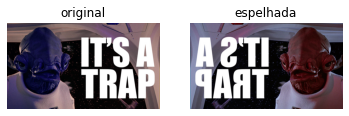

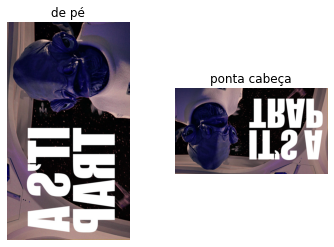

In [11]:
visualizar(image, espelhada, "original", "espelhada")
visualizar(emPe, ponta_cabeca, "de pé", "ponta cabeça")

In [12]:
def corta_imagem(image, fator):
    altura, largura, canais = image.shape
    limy, limx = int(altura*fator), int(largura*fator)
    zoom = []
    for i in range(altura):
        atual = []
        for j in range(largura):
            if (i > limy - 1 and i < altura - limy) and (j > limx - 1 and j < largura - limx):
                atual.append(image[i][j])
        if len(atual) > 0:
            zoom.append(atual)
    return np.array(zoom)
    


path = r'C:\Users\Enzo\Desktop\Turing\Projeto Area de Foco\Faith.jpg'
image = cv2.imread(path)
zoomed = corta_imagem(image, 0.2)
cv2.imshow("Original", image)
cv2.imshow("Cortada", zoomed)
cv2.waitKey(0)
cv2.destroyAllWindows()

Talvez tenha faltado a parte do aleatório, eu no caso usei 20%, mas séria apenas selecionar um fator aleatório, poderíamos usar por exemplo `np.random.uniform(low=0.1, high=0.5)`, esse exemplo no caso nos forneceria um número aleatório entre 0.1 e 0.5 o qual poderíamos usar como fator de aumento na nossa foto.

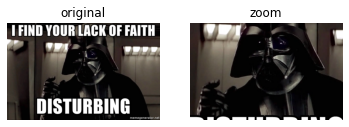

In [13]:
visualizar(image, zoomed, title2="zoom")

Vamos tentar fazer essas funções utilizando o Tensorflow.keras

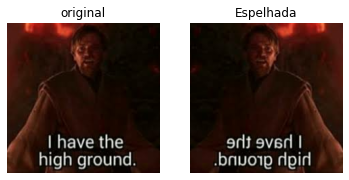

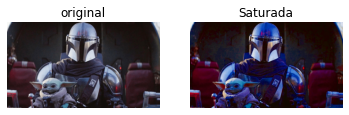

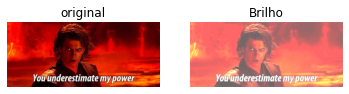

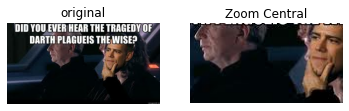

In [14]:
path = r"C:\Users\Enzo\Desktop\Turing\Projeto Area de Foco"

#Espelhar
arquivo = r"\High Ground.jpg"
image = tf.image.decode_jpeg(tf.io.read_file(path + arquivo), channels=3)
espelhada = tf.image.flip_left_right(image)
visualizar(image, espelhada, title2="Espelhada")

#Preto e Branco
arquivo = r"\TheWay.png"
image = tf.image.decode_png(tf.io.read_file(path + arquivo), channels=3)
saturada = tf.image.adjust_saturation(image, 3)
visualizar(image, tf.squeeze(saturada), title2="Saturada")

#Brilho
arquivo = r"\Power.png"
image = tf.image.decode_png(tf.io.read_file(path + arquivo), channels=3)
brilho = tf.image.adjust_brightness(image, 0.4)
visualizar(image, brilho, title2="Brilho")

#Zoom Central
arquivo = r"\Darth Plagueis.jpg"
image = tf.image.decode_png(tf.io.read_file(path + arquivo), channels=3)
cortada = tf.image.central_crop(image, central_fraction=0.5)
visualizar(image, cortada, title2="Zoom Central")

## Tarefa 4 - Efeitos

Aplique alguns filtros como *blur, gaussian blur e median blur* na sua imagem (pode usar o openCV ~eu ouvi um amém ?~)

Links:
*  [TowardsDataScience](https://towardsdatascience.com/image-filters-in-python-26ee938e57d2)
*  [OpenCV](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html)

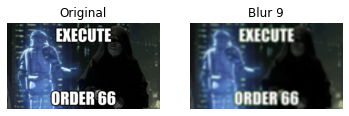

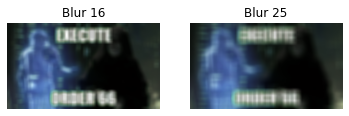

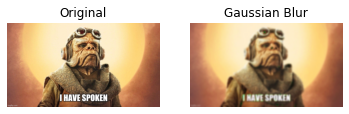

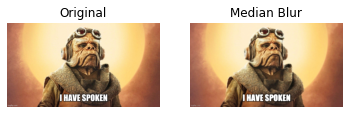

In [15]:
#Blur

image   = cv2.imread('Order 66.png')
image   = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
blur_9  = cv2.blur(image, (9, 9))
blur_16 = cv2.blur(image, (16, 16))
blur_25 = cv2.blur(image, (25, 25))
visualizar(cv2.cvtColor(image, cv2.COLOR_HSV2RGB), cv2.cvtColor(blur_9, cv2.COLOR_HSV2RGB), "Original", "Blur 9")
visualizar(cv2.cvtColor(blur_16, cv2.COLOR_HSV2RGB), cv2.cvtColor(blur_25, cv2.COLOR_HSV2RGB), "Blur 16", "Blur 25")
#Isso vai ser muito útil para fazer memes qualidade e sincronia

#Gaussian Blur

image   = cv2.imread('I have spoken.jpg')
image   = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
gaussian_blur = cv2.GaussianBlur(image, (25, 25), 0)
visualizar(cv2.cvtColor(image, cv2.COLOR_HSV2RGB), cv2.cvtColor(gaussian_blur, cv2.COLOR_HSV2RGB), "Original", "Gaussian Blur")

#Median Blur
median = cv2.medianBlur(image, 5)
visualizar(cv2.cvtColor(image, cv2.COLOR_HSV2RGB), cv2.cvtColor(median, cv2.COLOR_HSV2RGB), "Original", "Median Blur")

# Parte 2 - Tarefas de classificação:

In [16]:
import tensorflow as tf
import torch
from sklearn.model_selection import train_test_split
import sklearn as sk
import skimage
import glob
import os
import pickle
import random

## Tarefa 1 - Dividir o dataset

Nesta tarefa você precisa dividir as imagens em treino e teste para conseguir fazer seu modelo de predição, para isso existem funções do tensorflow.keras para isso, mas pode usar também o `os` se preferir

Links:
*  [Kaggle](https://www.kaggle.com/freeman89/create-dataset-with-tensorflow)
*  [WizardForcel](https://wizardforcel.gitbooks.io/tensorflow-examples-aymericdamien/content/5.1_build_an_image_dataset.html)
*  Extra: [Youtube](https://www.youtube.com/watch?v=j-3vuBynnOE)

Primeiro vou criar um Dataset, para isso vou usar o os para percorrer minhas pastas e poder criar um dataset mais no estilo que já estava acostumado, incluindo as labels, que para isso vão ser os próprios nomes das pastas -> para isso dei uma olhada nesse Extra do youtube que eu marquei, pois estava tendo um pouco de problemas com isso, depois descobri [este GitHub](https://github.com/soumilshah1995/Smart-Library-to-load-image-Dataset-for-Convolution-Neural-Network-Tensorflow-Keras-/blob/master/masterimage.py) de uma biblioteca que faz isso automaticamente e, inclusive acha já qual as labels

In [27]:
pasta = r'C:\Users\Enzo\Desktop\Turing\Projeto Area de Foco\Dataset'
categorias = ["Darth Vader", "Stormtrooper", "Yoda"]
tamanho = 200
dataset = []

for categoria in categorias:
    caminho = os.path.join(pasta, categoria)
    numero = categorias.index(categoria)
    for imagem in os.listdir(caminho):
        try:
            imagem_array = cv2.imread(os.path.join(caminho, imagem), cv2.IMREAD_COLOR)
            redimensionado = cv2.resize(imagem_array, (tamanho, tamanho))
            dataset.append([redimensionado, numero])
        except Exception:
            pass

Legal, agora temos um dataset, vamos antes dar uma embaralhada nele e depois dividir no nosso X e y e depois splitar em teste e treino

In [28]:
random.shuffle(dataset)

X, y = [], []

for imagem, rotulo in dataset:
    X.append(imagem)
    y.append(rotulo)

X, y = np.array(X).reshape(-1, tamanho, tamanho, 3), np.array(y)

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.15, stratify=y)

## Tarefa 2

Transforme agora seu dataset de imagens em um tensor utilizando o keras

Links:
*  [Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

In [29]:
X_treino_tensor = tf.convert_to_tensor(X_treino)
X_teste_tensor  = tf.convert_to_tensor(X_teste)
y_treino_tensor = tf.convert_to_tensor(y_treino)
y_teste_tensor  = tf.convert_to_tensor(y_teste)

## Tarefa 3

Agora tente aplicar um modelo de sua preferência para tentar classificar as imagens, como sugestão: transforme suas imagens em um vetor 1xN e tente aplicar um modelo de regressão logística

Links

*  [Kaggle](https://www.kaggle.com/gulsahdemiryurek/image-classification-with-logistic-regression)

In [30]:
def to_1D(imagens):
    array_1D = []
    for imagem in imagens:
        altura, largura, cores = imagem.shape
        imagem_1D = imagem.reshape(altura*largura*cores)
        array_1D.append(imagem_1D)
    return np.array(array_1D)

X_treino_1D = to_1D(X_treino)
X_teste_1D  = to_1D(X_teste)

In [31]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42, solver="sag", max_iter=5).fit(X_treino_1D, y_treino)
logreg.score(X_teste_1D, y_teste)

C:\Users\Enzo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.5745454545454546

## Tarefa 4

Agora, tente criar um Rede Neural Convolucional (CNN), é recomendado utilizar o keras para essa tarefa. Depois disso teste a acurácia e compare com o modelo anterior

Links:
*  [TensorFlow](https://www.tensorflow.org/tutorials/images/cnn)
*  [Keras](https://keras.io/examples/vision/mnist_convnet/)


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical, normalize
from tensorflow import keras
from tensorflow.keras import layers

In [33]:
X_treino_tensor_norm = normalize(X_treino_tensor)
X_teste_tensor_norm  = normalize(X_teste_tensor)

y_treino_tensor_onehot = to_categorical(y_treino_tensor, 3)
y_teste_tensor_onehot  = to_categorical(y_teste_tensor, 3)

In [34]:
print(X_treino_tensor.shape)

(1552, 200, 200, 3)


In [48]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(200,200,3)))
model.add(Dropout(0.5))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [49]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
hist = model.fit(X_treino_tensor,
                 y_treino_tensor_onehot,
                 validation_data=(X_teste_tensor, y_teste_tensor_onehot),
                 epochs=20)

Epoch 1/20
49/49 [==============================] - 198s 4s/step - loss: 1.0730 - accuracy: 0.4832 - val_loss: 1.0877 - val_accuracy: 0.4073
Epoch 2/20
49/49 [==============================] - 198s 4s/step - loss: 1.0032 - accuracy: 0.4865 - val_loss: 1.0899 - val_accuracy: 0.4000
Epoch 3/20
49/49 [==============================] - 200s 4s/step - loss: 0.9175 - accuracy: 0.5451 - val_loss: 1.1044 - val_accuracy: 0.4036
Epoch 4/20
49/49 [==============================] - 212s 4s/step - loss: 0.8387 - accuracy: 0.5838 - val_loss: 1.1191 - val_accuracy: 0.4073
Epoch 5/20
49/49 [==============================] - 208s 4s/step - loss: 0.7829 - accuracy: 0.6321 - val_loss: 1.1424 - val_accuracy: 0.4036
Epoch 6/20
49/49 [==============================] - 205s 4s/step - loss: 0.7106 - accuracy: 0.6656 - val_loss: 1.2276 - val_accuracy: 0.3927
Epoch 7/20
49/49 [==============================] - 211s 4s/step - loss: 0.6342 - accuracy: 0.7043 - val_loss: 1.3122 - val_accuracy: 0.3855
Epoch 8/20
49